In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [18]:
def area(box):
    return (box[2] - box[0]) * (box[3] - box[1])


def intersection_over_union(boxes):
    assert(len(boxes) == 8)
    boxA = boxes[:4].values
    boxB = boxes[4:].values
    
    boxAArea = area(boxA)
    boxBArea = area(boxB)
    
    if (boxAArea == 0 or boxBArea == 0):
        return 0
        
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    interArea = max(0, xB - xA) * max(0, yB - yA)

    
    iou = interArea / float(boxAArea + boxBArea - interArea)
    return iou

In [19]:
votes = pd.read_csv("train_data.csv")

In [20]:
answers = pd.read_csv("train_answers.csv")

In [5]:
quorum = votes.groupby("itemId")[['Xmin','Ymin', 'Xmax', 'Ymax']].mean().reset_index()

In [6]:
data = quorum.merge(answers, on=["itemId"])

,itemId,Xmin,Ymin,Xmax,Ymax
0,5,184.333333,918.666667,501.333333,1248.666667
1,10,87.666667,562.666667,416.333333,855.333333
2,13,69.666667,603.000000,596.666667,966.666667
3,30,91.400000,365.600000,269.200000,459.200000
4,32,28.166667,556.000000,256.166667,756.833333
5,48,52.333333,1030.333333,155.000000,1101.000000
6,64,26.000000,426.000000,217.333333,561.666667
7,78,85.750000,204.750000,592.250000,692.750000
8,90,78.333333,273.000000,427.000000,561.666667
9,118,87.666667,1271.000000,180.666667,1335.000000


In [7]:
data["iou"] = data[['Xmin','Ymin', 'Xmax', 'Ymax', 'Xmin_true',\
      'Ymin_true', 'Xmax_true','Ymax_true']].apply(intersection_over_union, axis=1)

In [8]:
data["iou"].mean()

0.5058725791429202

In [27]:
votes1 = pd.read_csv("test_data.csv")
quorum1 = votes1.groupby("itemId")[['Xmin','Ymin', 'Xmax', 'Ymax']].mean().reset_index()

In [66]:
x_mi=votes1.groupby("itemId")[['Xmin']].quantile(.0)
x_ma=votes1.groupby("itemId")[['Xmax']].quantile(1.0)
y_mi=votes1.groupby("itemId")[['Ymin']].quantile(.0)
y_ma=votes1.groupby("itemId")[['Ymax']].quantile(1.0)
dd=x_mi.merge(y_mi,on=["itemId"])
dd=dd.merge(x_ma,on=["itemId"])
dd=dd.merge(y_ma,on=["itemId"]).reset_index()

dd['X_diap']= (-1.0)*(dd['Xmax']-dd['Xmin'])*0
dd['Y_diap']= (-1.0)*(dd['Ymax']-dd['Ymin'])*0
ddd=dd.copy()
ddd['Xmax']=dd['Xmax']
ddd['Xmin']=dd['Xmin']
ddd['Ymax']=dd['Ymax']
ddd['Ymin']=dd['Ymin']

ddd1=ddd[['itemId','Xmin','Ymin', 'Xmax', 'Ymax']]
data = ddd1.merge(answers, on=["itemId"])

data["iou"] = data[['Xmin','Ymin', 'Xmax', 'Ymax', 'Xmin_true',\
      'Ymin_true', 'Xmax_true','Ymax_true']].apply(intersection_over_union, axis=1)

data["iou"].mean()

0.5809800227327839

In [25]:
data['xminotkl']=data['Xmin_true']-data['Xmin']
data['yminotkl']=data['Ymin_true']-data['Ymin']
data['xmaxotkl']=data['Xmax_true']-data['Xmax']
data['ymaxotkl']=data['Ymax_true']-data['Ymax']
print data['xminotkl'].median(), data['xminotkl'].mean()
print data['yminotkl'].median(), data['yminotkl'].mean()
print data['xmaxotkl'].median(), data['xmaxotkl'].mean()
print data['ymaxotkl'].median(), data['ymaxotkl'].mean()

-14.0 -23.1081654295
-8.0 -14.7274655355
11.0 22.0095440085
6.0 12.1495227996


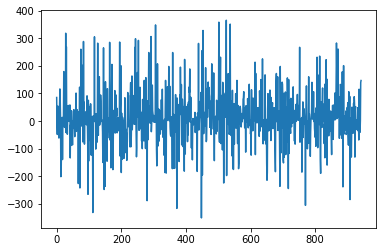

In [26]:
plt.plot(data['ymaxotkl'])

In [43]:
dd.to_csv('submit.csv')

In [21]:
votes_test = pd.read_csv("test_data.csv")

In [22]:
a=list(set(list(votes_test['userId'])))
b=list(set(list(votes['userId'])))

In [23]:
iou_train={}
for user in b:
    x=votes.loc[votes['userId']==user][['itemId','Xmin','Ymin', 'Xmax', 'Ymax']].reset_index().merge(answers, on='itemId')
    x["iou"] = x[['Xmin','Ymin', 'Xmax', 'Ymax', 'Xmin_true', 'Ymin_true', 'Xmax_true','Ymax_true']].apply(intersection_over_union, axis=1)
    r=x["iou"].mean()
    iou_train[user]=r
    

In [37]:
#sorted(iou_train.items(), key=lambda x: x[1], reverse=1)
print pd.DataFrame(map(lambda x: x[1], iou_train.items())).median()
print pd.DataFrame(map(lambda x: x[1], iou_train.items())).mean()
user_iou_mean=0.455

0    0.469785
dtype: float64
0    0.448728
dtype: float64


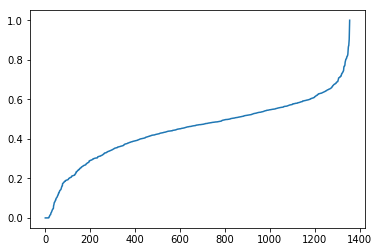

In [34]:
plt.plot(pd.DataFrame(sorted(map(lambda x: x[1], iou_train.items()))))

In [24]:
it=sorted(b)
votes['user_score']=votes['userId'].apply(lambda x: iou_train[x])

In [60]:
e=votes.loc[votes['itemId']==13][['userId','Xmin','Ymin', 'Xmax', 'Ymax','user_score']].reset_index()
#e.loc[e['user_score']>0.4][['Xmin','Ymin', 'Xmax', 'Ymax']]
#e.loc[e['user_score']==list(e['user_score'])[0]]
np.array(e['user_score']).max()

0.48293378624498506

## Тренировочные с порогом

In [557]:
def drop_under_thr(x, thr=0.4):
    scores=np.array(x['user_score'])
    len_scores=len(scores)
    scores_above_thr=[i for i in scores if i>thr]
    if len(scores_above_thr)>0:
        rez=x.loc[x['user_score']>thr][['userId','itemId','Xmin','Ymin', 'Xmax', 'Ymax','user_score']]
    else:
        rez=x.loc[x['user_score']==scores.max()][['userId','itemId','Xmin','Ymin', 'Xmax', 'Ymax','user_score']]
    return rez    

In [558]:
votes= pd.read_csv("train_data.csv")
votes['user_score']=votes['userId'].apply(lambda x: iou_train[x])
votes_new=votes.groupby("itemId").apply(lambda x: drop_under_thr(x,0.27))

In [559]:
votes_new

userId  itemId  Xmin  Ymin  Xmax  Ymax  user_score
itemId                                                         
5      2988     141       5   210   925   483  1255    0.385265
       2989     903       5   151   917   511  1160    0.482934
       2990    1723       5   192   914   510  1331    0.413349
10     3764     903      10    72   570   420   858    0.482934
       3765    1723      10    96   559   402   856    0.413349
       3766     141      10    95   559   427   852    0.385265
13     3361     903      13    94   603   608   950    0.482934
       3362    1723      13    69   606   561   981    0.413349
       3363     141      13    46   600   621   969    0.385265
30     2956     141      30    96   367    97   369    0.385265
       2957    1573      30   124   374   286   468    0.312481
       2958    1565      30    65   375   324   477    0.550318
       2959    1508      30    85   359   323   491    0.378287
       2960     903      30    87   353   316   491    0.482934
32     1723     141      32    21   279   388   624    0.385265
       1724     366      32     9   321   387   638    0.479693
       1725     903      32    17   319   380   631    0.482934
       2348     141      32    42   799   128   881    0.385265
       2349     366      32    39   809   128   884    0.479693
       2350     903      32    41   809   126   883    0.482934
48     4287     903      48    52  1033   144  1098    0.482934
       4288     366      48    50  1029   163  1103    0.479693
       4289     141      48    55  1029   158  1102    0.385265
64     1427     903      64    30   436   173   564    0.482934
       1428     366      64    22   417   244   562    0.479693
       1429    1565      64    26   425   235   559    0.550318
78     5029    1565      78    75   224   590   707    0.550318
       5030    1508      78    99   197   587   705    0.378287
       5031     903      78    49   194   617   652    0.482934
       5032    1573      78   120   204   575   707    0.312481
...             ...     ...   ...   ...   ...   ...         ...
35738  3730     506   35738    75   625   118   652    0.485451
       3731     886   35738    78   623   113   646    0.471088
       3732     169   35738    67   618   124   652    0.477456
       3733    1698   35738    80   625   113   646    0.421267
       3734    1704   35738    48   605   158   665    0.494397
       3735    1046   35738    72   622   117   651    0.419834
35799  55       506   35799    52   833   857  1281    0.485451
       56       886   35799    44   787   866  1286    0.471088
       57       615   35799    47   859   842  1296    0.538883
35851  5298    1684   35851    31   540   183   621    0.519843
       5299     378   35851    29   531   193   640    0.605809
       5300     828   35851    25   540   193   641    0.423584
35868  4986     831   35868    63   607   314   766    0.528334
       4987     555   35868   164   631   323   780    0.505367
       4988    1684   35868    92   610   312   783    0.519843
       4989    1750   35868    77   609   320   757    0.493804
       4990    1359   35868    76   609   317   795    0.473900
       4991     984   35868    80   605   316   783    0.451067
       4992    1243   35868    72   602   314   806    0.536507
       4993    1585   35868   151   637   313   787    0.470379
35873  787     1585   35873   292   490   643   834    0.470379
       789     1684   35873   249   492   637   812    0.519843
       790      828   35873    56   480   658   896    0.423584
       791     1400   35873   361   477   652   892    0.355218
35962  2795    1602   35962    79   447   586   902    0.544872
       2796    1698   35962   108   538   369   816    0.421267
       2797    1046   35962    84   527   394   854    0.419834
       2798     279   35962    60   524   467   907    0.483925
       2799     886   35962    57   555   458   899    0.471088
       2800    1408   35962    85   514   376

In [535]:
votes= pd.read_csv("train_data.csv")
votes['user_score']=votes['userId'].apply(lambda x: iou_train[x])
answers = pd.read_csv("train_answers.csv")
def search_thr(th):
    votes_new=votes.groupby("itemId").apply(lambda x: drop_under_thr(x,th))

    x_mi=votes_new[['userId','Xmin','Ymin', 'Xmax', 'Ymax','user_score']].groupby("itemId")[['Xmin']].quantile(.0)
    x_ma=votes_new[['userId','Xmin','Ymin', 'Xmax', 'Ymax','user_score']].groupby("itemId")[['Xmax']].quantile(1.0)
    y_mi=votes_new[['userId','Xmin','Ymin', 'Xmax', 'Ymax','user_score']].groupby("itemId")[['Ymin']].quantile(.0)
    y_ma=votes_new[['userId','Xmin','Ymin', 'Xmax', 'Ymax','user_score']].groupby("itemId")[['Ymax']].quantile(1.0)
    dd=x_mi.merge(y_mi,on=["itemId"])
    dd=dd.merge(x_ma,on=["itemId"])
    dd=dd.merge(y_ma,on=["itemId"]).reset_index()

    #d['X_diap']= (-1.0)*(dd['Xmax']-dd['Xmin'])*0
    #d['Y_diap']= (-1.0)*(dd['Ymax']-dd['Ymin'])*0
    ddd=dd.copy()
    ddd['Xmax']=dd['Xmax']
    ddd['Xmin']=dd['Xmin']
    ddd['Ymax']=dd['Ymax']
    ddd['Ymin']=dd['Ymin']

    ddd1=ddd[['itemId','Xmin','Ymin', 'Xmax', 'Ymax']]
    data = ddd1.merge(answers, on=["itemId"])

    data["iou"] = data[['Xmin','Ymin', 'Xmax', 'Ymax', 'Xmin_true',\
          'Ymin_true', 'Xmax_true','Ymax_true']].apply(intersection_over_union, axis=1)

    return data["iou"].mean()

In [135]:
#votes_new[['userId','Xmin','Ymin', 'Xmax', 'Ymax','user_score']].groupby("itemId")[['Xmin']].quantile(.0)

In [552]:
votes= pd.read_csv("train_data.csv")
answers = pd.read_csv("train_answers.csv")

x_mi=votes_new[['userId','Xmin','Ymin', 'Xmax', 'Ymax','user_score']].groupby("itemId")[['Xmin']].quantile(.0)
x_ma=votes_new[['userId','Xmin','Ymin', 'Xmax', 'Ymax','user_score']].groupby("itemId")[['Xmax']].quantile(1.0)
y_mi=votes_new[['userId','Xmin','Ymin', 'Xmax', 'Ymax','user_score']].groupby("itemId")[['Ymin']].quantile(.0)
y_ma=votes_new[['userId','Xmin','Ymin', 'Xmax', 'Ymax','user_score']].groupby("itemId")[['Ymax']].quantile(1.0)
dd=x_mi.merge(y_mi,on=["itemId"])
dd=dd.merge(x_ma,on=["itemId"])
dd=dd.merge(y_ma,on=["itemId"]).reset_index()

dd['X_diap']= (-1.0)*(dd['Xmax']-dd['Xmin'])*0.004
dd['Y_diap']= (0.0)*(dd['Ymax']-dd['Ymin'])*0.005
ddd=dd.copy()
ddd['Xmax']=dd['Xmax']-dd['X_diap']
ddd['Xmin']=dd['Xmin']+dd['X_diap']
ddd['Ymax']=dd['Ymax']-dd['Y_diap']
ddd['Ymin']=dd['Ymin']+dd['Y_diap']

ddd1=ddd[['itemId','Xmin','Ymin', 'Xmax', 'Ymax']]
data = ddd1.merge(answers, on=["itemId"])

data["iou"] = data[['Xmin','Ymin', 'Xmax', 'Ymax', 'Xmin_true',\
      'Ymin_true', 'Xmax_true','Ymax_true']].apply(intersection_over_union, axis=1)

data["iou"].mean()

0.5813079553335508

In [202]:
xx,yy=[],[]
for i in np.arange(0.0,0.6,0.02):
    xx.append(i)
    t=(search_thr(i)-0.58)*1000.0
    yy.append(t)
    print i, t

0.0 0.972260363707
0.02 0.972260363707
0.04 0.972260363707
0.06 0.972260363707
0.08 0.972260363707
0.1 0.972260363707
0.12 0.960154762987
0.14 0.89839212754
0.16 0.827340067449
0.18 0.856184986005
0.2 0.962559869363
0.22 1.02616663405
0.24 1.05885304184
0.26 1.19466082951
0.28 1.16676664091
0.3 1.21874512863
0.32 1.33787970663
0.34 1.2368209433
0.36 0.627287330678
0.38 -0.819032365215
0.4 -1.19152426672
0.42 -2.11539672924
0.44 -4.00880183037
0.46 -4.65939632165
0.48 -7.30175897024
0.5 -10.5490220433
0.52 -12.6697033329
0.54 -11.9930858048
0.56 -12.4723749398
0.58 -13.3208115034


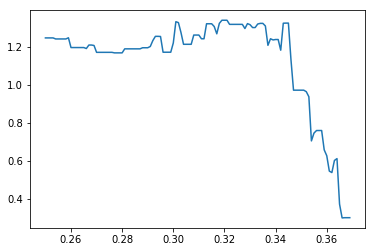

In [189]:
plt.plot(xx[50:170],yy[50:170])

## С порогом на тестовой

In [25]:
test_votes= pd.read_csv("test_data.csv")

In [26]:
def apply_iou_score(x):
    if x in iou_train:
        return iou_train[x]
    else:
        return 0.445

In [27]:
test_votes['user_score']=test_votes['userId'].apply(lambda x: apply_iou_score(x))
test_votes_new=test_votes.groupby("itemId").apply(lambda x: drop_under_thr(x,0.32))

NameError: global name 'drop_under_thr' is not defined

In [556]:
x_mi=test_votes_new[['userId','Xmin','Ymin', 'Xmax', 'Ymax','user_score']].groupby("itemId")[['Xmin']].quantile(.0)
x_ma=test_votes_new[['userId','Xmin','Ymin', 'Xmax', 'Ymax','user_score']].groupby("itemId")[['Xmax']].quantile(1.0)
y_mi=test_votes_new[['userId','Xmin','Ymin', 'Xmax', 'Ymax','user_score']].groupby("itemId")[['Ymin']].quantile(.0)
y_ma=test_votes_new[['userId','Xmin','Ymin', 'Xmax', 'Ymax','user_score']].groupby("itemId")[['Ymax']].quantile(1.0)
dd=x_mi.merge(y_mi,on=["itemId"])
dd=dd.merge(x_ma,on=["itemId"])
dd=dd.merge(y_ma,on=["itemId"]).reset_index()

dd['X_diap']= (-1.0)*(dd['Xmax']-dd['Xmin'])*0.005
dd['Y_diap']= (-1.0)*(dd['Ymax']-dd['Ymin'])*0
ddd=dd.copy()
ddd['Xmax']=dd['Xmax']-dd['X_diap']
ddd['Xmin']=dd['Xmin']+dd['X_diap']
ddd['Ymax']=dd['Ymax']
ddd['Ymin']=dd['Ymin']

ddd1=ddd[['itemId','Xmin','Ymin', 'Xmax', 'Ymax']]
ddd1.to_csv('submit_thr.csv',index=0)

## Обучаем на каждого юзера

In [28]:
from sklearn.linear_model import LinearRegression as LR

In [29]:
votes= pd.read_csv("train_data.csv")
votes['user_score']=votes['userId'].apply(lambda x: apply_iou_score(x))
answers = pd.read_csv("train_answers.csv")

In [30]:
ii=list(votes.loc[votes['userId']==55]['itemId'])
votes.loc[votes['userId']==55]

,userId,itemId,Xmin,Ymin,Xmax,Ymax,user_score
327,55,22125,63,783,454,1130,0.424793
486,55,22165,114,461,309,636,0.424793
575,55,21659,101,852,681,1332,0.424793
979,55,22610,44,492,70,501,0.424793
1240,55,21605,284,863,506,1149,0.424793
1963,55,22604,349,952,674,1251,0.424793
2852,55,22626,22,520,248,721,0.424793
3160,55,21080,285,485,775,985,0.424793
3298,55,23294,137,415,675,774,0.424793
3753,55,22164,30,351,131,451,0.424793


In [34]:
votes.loc[votes['userId']==55]
#x.loc[x['itemId']==6132]['Ymin']

,userId,itemId,Xmin,Ymin,Xmax,Ymax,user_score
327,55,22125,63,783,454,1130,0.424793
486,55,22165,114,461,309,636,0.424793
575,55,21659,101,852,681,1332,0.424793
979,55,22610,44,492,70,501,0.424793
1240,55,21605,284,863,506,1149,0.424793
1963,55,22604,349,952,674,1251,0.424793
2852,55,22626,22,520,248,721,0.424793
3160,55,21080,285,485,775,985,0.424793
3298,55,23294,137,415,675,774,0.424793
3753,55,22164,30,351,131,451,0.424793


In [32]:
def lin_reg_user(us_id):
    l={}
    x=votes.loc[votes['userId']==us_id]
    ss=list(x['itemId'])
    ans_user=answers.loc[answers['itemId'].isin(ss)]
    for i in ['Xmin', 'Ymin', 'Xmax', 'Ymax']:
        l[i]=LR()
        igrek, iks=[],[]
        for ii in ss:
            igrek.append(list(ans_user.loc[ans_user['itemId']==ii][i+'_true'])[0])
            iks.append(list(x.loc[x['itemId']==ii][i])[0])
        l[i].fit(np.array(iks).reshape(-1,1), np.array(igrek))
    return l

def predict_reg_users(xx):
    votes_after_regr=votes.copy()
    for user in b:
        for i in ['Xmin', 'Ymin', 'Xmax', 'Ymax']:
            votes_after_regr[i+'_regr']=votes_after_regr[votes_after_regr['userId']==user][[i]].apply(lambda x: xx[user][i].predict(np.array(x).reshape(-1,1)))
    return votes_after_regr

In [33]:
u={}
for user in b:
    u[user]=lin_reg_user(user)

In [464]:
votes_after_regr=votes.copy()
tt=[]
for user in b:
    temp=[]
    for i in ['Xmin', 'Ymin', 'Xmax', 'Ymax']:
        temp.append(votes_after_regr[votes_after_regr['userId']==user][[i]].apply(lambda x: np.around(u[user][i].predict(np.array(x).reshape(-1,1))) ))
    te=pd.concat(temp,axis=1)
    tt.append(te)
tt=pd.concat(tt)
tt=tt.rename(columns={'Xmin':'Xmin_true','Ymin':'Ymin_true','Xmax':'Xmax_true','Ymax':'Ymax_true'})
rez=pd.concat([votes_after_regr,tt],axis=1)
#votes_after_regr

In [467]:
votes=rez
search_thr(0.32)

0.5813378797066331

## Лин регр на тестовой

In [527]:
tt=[]
for user in a:
    if user in b:
        temp=[]
        for i in ['Xmin', 'Ymin', 'Xmax', 'Ymax']:
            temp.append(votes_test[votes_test['userId']==user][[i]].apply(lambda x: np.around(u[user][i].predict(np.array(x).reshape(-1,1))) ))
        ite=votes_test[votes_test['userId']==user][['itemId','userId']]
        temp.append(ite)
        te=pd.concat(temp,axis=1)
        tt.append(te)
    else:
        #pass
        tt.append(votes_test[votes_test['userId']==user][[ 'Xmin', 'Ymin', 'Xmax', 'Ymax','itemId','userId']])
tt=pd.concat(tt) 
tess=tt[['itemId','userId','Xmin','Ymin', 'Xmax', 'Ymax']].copy()


In [528]:
tess['user_score']=tess['userId'].apply(lambda x: apply_iou_score(x))
test_votes_new=tess.groupby("itemId").apply(lambda x: drop_under_thr(x,0.32))

In [532]:
x_mi=test_votes_new[['userId','Xmin','Ymin', 'Xmax', 'Ymax','user_score']].groupby("itemId")[['Xmin']].quantile(.0)
x_ma=test_votes_new[['userId','Xmin','Ymin', 'Xmax', 'Ymax','user_score']].groupby("itemId")[['Xmax']].quantile(1.0)
y_mi=test_votes_new[['userId','Xmin','Ymin', 'Xmax', 'Ymax','user_score']].groupby("itemId")[['Ymin']].quantile(.0)
y_ma=test_votes_new[['userId','Xmin','Ymin', 'Xmax', 'Ymax','user_score']].groupby("itemId")[['Ymax']].quantile(1.0)
dd=x_mi.merge(y_mi,on=["itemId"])
dd=dd.merge(x_ma,on=["itemId"])
dd=dd.merge(y_ma,on=["itemId"]).reset_index()

dd['X_diap']= (-1.0)*(dd['Xmax']-dd['Xmin'])*0
dd['Y_diap']= (-1.0)*(dd['Ymax']-dd['Ymin'])*0
ddd=dd.copy()
ddd['Xmax']=dd['Xmax']
ddd['Xmin']=dd['Xmin']
ddd['Ymax']=dd['Ymax']
ddd['Ymin']=dd['Ymin']

ddd1=ddd[['itemId','Xmin','Ymin', 'Xmax', 'Ymax']]
ddd1.to_csv('submit_reg_thr.csv',index=0)

In [481]:
qwer=votes_test[votes_test['userId']==55][[i]]

In [485]:
wer=votes_test[votes_test['userId']==55][['itemId']]
pd.concat([qwer,wer],axis=1)

,Ymax,itemId
126,649,22107
575,683,22771
1187,812,22679
2311,771,21618
2688,662,22681
3128,1162,22118
3268,701,22168
3383,1328,22657


In [488]:
qwer=votes_test[votes_test['userId']==1][[i]]
wer=votes_test[votes_test['userId']==1][['itemId']]
pd.concat([qwer,wer],axis=1)

,Ymax,itemId
2484,779,6544
